In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

**1. Uploading Data Train**

In [21]:
DTrain = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/NeiveBayes/main/MNIST_train.csv')

print(DTrain.head(5))
print(DTrain.shape)

   index  labels  0  1  2  3  4  5  6  7  ...  774  775  776  777  778  779  \
0      0       5  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1      1       0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2      2       4  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
3      3       1  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
4      4       9  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

   780  781  782  783  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  

[5 rows x 786 columns]
(54999, 786)


In [22]:
X_train = DTrain.drop(["labels", "index"], axis=1)
X_train_toplot = X_train
print (X_train)
print (X_train.shape)

       0  1  2  3  4  5  6  7  8  9  ...  774  775  776  777  778  779  780  \
0      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...   .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
54994  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
54995  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
54996  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
54997  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
54998  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

       781  782  783  
0        0    0    0  
1    

In [23]:
from math import sqrt
#St_X_train = X_train.describe()
St_X_train = X_train.to_numpy()
St_X_train = St_X_train.flatten()

def max(n):
  max = n[0]
  for i in range(0, len(n)):
    if n[i] > max:
      max = n[i]
  return max

'''
def min(n):
  min = n[0]
  for i in range(0, len(n)):
    if n[i] < min:
      min = n[i]
  return min

def mean(n):
  count = 0
  sum = n[0]
  for i in range(0, len(n)):
      count = count + 1
      sum = sum + n[i]
  mean=sum/count
  return mean

def std(n):
  count = 0
  sum = n[0]
  
  for i in range(0, len(n)):
      count = count + 1
      sum = sum + n[i]
  mean=sum/count

  std_sum = 0
  for i in n:
    std_sum += (i-mean)**2
  std = std_sum / (count-1)

  return sqrt(std)


print("The max value is: ", max(St_X_train))
print("The min value is: ", min(St_X_train))
print("The mean is: ", mean(St_X_train))
print("The std is: ", std(St_X_train))

'''

'\ndef min(n):\n  min = n[0]\n  for i in range(0, len(n)):\n    if n[i] < min:\n      min = n[i]\n  return min\n\ndef mean(n):\n  count = 0\n  sum = n[0]\n  for i in range(0, len(n)):\n      count = count + 1\n      sum = sum + n[i]\n  mean=sum/count\n  return mean\n\ndef std(n):\n  count = 0\n  sum = n[0]\n  \n  for i in range(0, len(n)):\n      count = count + 1\n      sum = sum + n[i]\n  mean=sum/count\n\n  std_sum = 0\n  for i in n:\n    std_sum += (i-mean)**2\n  std = std_sum / (count-1)\n\n  return sqrt(std)\n\n\nprint("The max value is: ", max(St_X_train))\nprint("The min value is: ", min(St_X_train))\nprint("The mean is: ", mean(St_X_train))\nprint("The std is: ", std(St_X_train))\n\n'

In [24]:
Y_train = DTrain['labels']
Y_train_toplot = Y_train
print (Y_train)
print (Y_train.shape)

0        5
1        0
2        4
3        1
4        9
        ..
54994    6
54995    7
54996    3
54997    0
54998    4
Name: labels, Length: 54999, dtype: int64
(54999,)


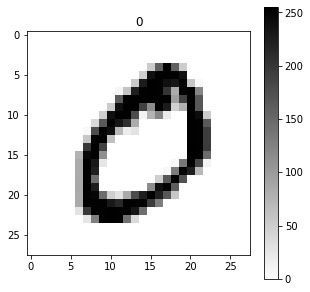

In [25]:
plt.figure(figsize = (5,5))
idx = 1

grid_data = X_train.iloc[idx].to_numpy().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray_r")
plt.title(Y_train[idx])
plt.colorbar()


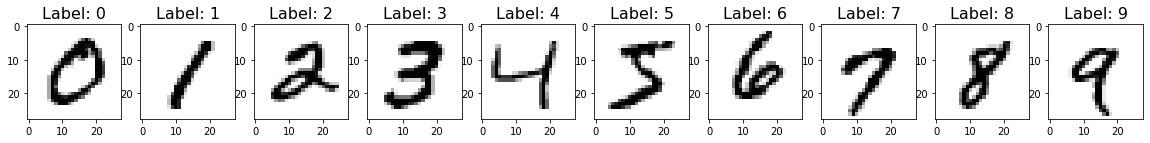

In [26]:
X_train_toplot = X_train_toplot.to_numpy()
Y_train_toplot = Y_train_toplot.to_numpy()

X_train_toplot = X_train_toplot.reshape(54999,28,28)

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_train_toplot[Y_train_toplot == i][0]
  ax[i].imshow(sample, cmap='gray_r')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [27]:
# Nomralize

Max_Value = max(St_X_train)
X_train = X_train / Max_Value

print (X_train)

         0    1    2    3    4    5    6    7    8    9  ...  774  775  776  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
54994  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
54998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       777  778  779  780  781  782  783  
0      0

**2. Uploading Data Test**

In [28]:
DTest = pd.read_csv('https://raw.githubusercontent.com/DavidGlezGmz/NeiveBayes/main/MNIST_test.csv')

print(DTest.head(5))
print(DTest.shape)

   index  labels  0  1  2  3  4  5  6  7  ...  774  775  776  777  778  779  \
0      0       7  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
1      1       2  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
2      2       1  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
3      3       0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   
4      4       4  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0   

   780  781  782  783  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0  

[5 rows x 786 columns]
(10000, 786)


In [29]:
X_test = DTest.drop(["labels", "index"], axis=1)
X_test_toplot = X_test
print (X_test)
print (X_test.shape)

      0  1  2  3  4  5  6  7  8  9  ...  774  775  776  777  778  779  780  \
0     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
1     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
3     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...  .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
9995  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
9996  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
9997  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
9998  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
9999  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

      781  782  783  
0       0    0    0  
1       0    0    0

In [30]:
Y_test = DTest['labels']
Y_test_toplot = Y_test
print (Y_test)
print (Y_test.shape)

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: labels, Length: 10000, dtype: int64
(10000,)


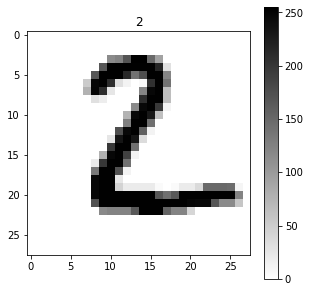

In [31]:
plt.figure(figsize = (5,5))
idx = 1

grid_data = X_test.iloc[idx].to_numpy().reshape(28, 28)
plt.imshow(grid_data, interpolation = "none", cmap = "gray_r")
plt.title(Y_test[idx])
plt.colorbar()

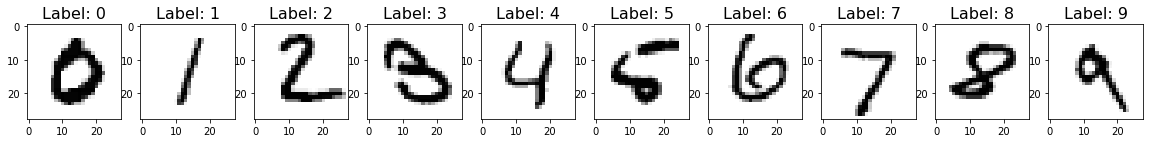

In [32]:
X_test_toplot = X_test_toplot.to_numpy()
Y_test_toplot = Y_test_toplot.to_numpy()

X_test_toplot = X_test_toplot.reshape(10000,28,28)

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = X_test_toplot[Y_test_toplot == i][0]
  ax[i].imshow(sample, cmap='gray_r')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

**3. Naive Bayes classifier**

In [33]:
class GaussNB():

  def fit(self, x, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:

      x_k = x[y==k,:]

      self.likelihoods[k] = {"mean": x_k.mean(axis=0), "cov": x_k.var(axis=0) + epsilon}
      self.priors[k] = len(x_k)/len(x)

  def predict(self, x):

    N, D = x.shape
    P_hat = np.zeros ((N,len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(x, l["mean"], l["cov"]) + np.log(self.priors[k])
    
    return P_hat.argmax(axis=1)

In [34]:
gnb = GaussNB()

In [35]:
gnb.fit(X_train.to_numpy(), Y_train.to_numpy())

In [36]:
y_hat_train=gnb.predict(X_train)
y_hat_test=gnb.predict(X_test)

In [37]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

print("GaussNB Accurancy for Training: ", (accuracy(Y_train, y_hat_train))*100)
print("GaussNB Accurancy for Testing: ", (accuracy(Y_test, y_hat_test))*100)

GaussNB Accurancy for Training:  76.42138947980872
GaussNB Accurancy for Testing:  65.49000000000001


In [38]:
class GaussBayes():
  
  def fit (self, x, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      x_k = x[y==k,:]
      N_k, D = x_k.shape
      mu_k = x_k.mean(axis=0)

      self.priors[k]=len(x_k)/len(x)
      self.likelihoods[k]={"mean": x_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((x_k-mu_k).T,x_k-mu_k)+epsilon*np.identity(D)}
          
  
  def predict(self, x):
    N,D = x.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(x,l["mean"], l["cov"])+np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [39]:
gbayes = GaussBayes()

In [40]:
gbayes.fit(X_train.to_numpy(), Y_train.to_numpy())

In [41]:
y_hat_gb_train = gbayes.predict(X_train)
y_hat_gb_test = gbayes.predict(X_test)

In [42]:
print("GaussBayes Accurancy for Training: ", (accuracy(Y_train, y_hat_gb_train)*100))
print("GaussBayes Accurancy for Testing: ", (accuracy(Y_test, y_hat_gb_test)*100))

GaussBayes Accurancy for Training:  93.11805669193986
GaussBayes Accurancy for Testing:  86.25


In [43]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(Y_test, y_hat_gb_test)
print(conf_mat)

[[939   0  10   6   0   5   3   1  16   0]
 [  0 561  46   4   8   0   7   0 509   0]
 [  3   0 983  10   1   0   1   4  30   0]
 [  3   0  25 907   1   9   0   4  58   3]
 [  0   0  26   1 921   0   1   5  22   6]
 [  4   0   9  42   2 749   6   1  75   4]
 [  9   0  13   1   5  22 880   0  28   0]
 [  0   0  17  12  25   1   0 904  31  38]
 [  6   0  21  23   3   6   0   4 909   2]
 [  4   0   6  13  36   1   0  23  54 872]]


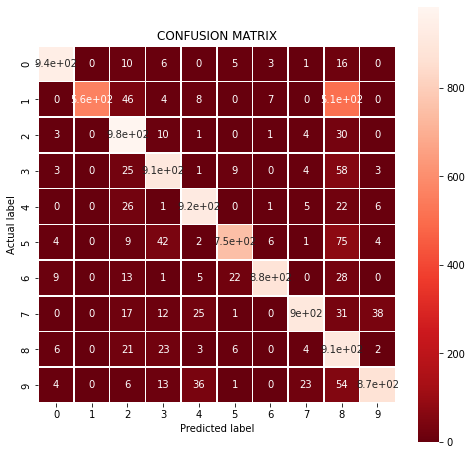

In [44]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'CONFUSION MATRIX'
plt.title(all_sample_title);